## Exercicio Modulo 1 IGTI - Algoritimo Kmeans


Importação das bibliotecas utilizadas

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from math import sqrt

Criação e exibição do dataset que será utilizado

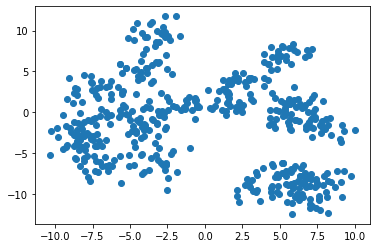

In [ ]:
x, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

Execução do algoritimo Kmeans com apenas 1 cluster

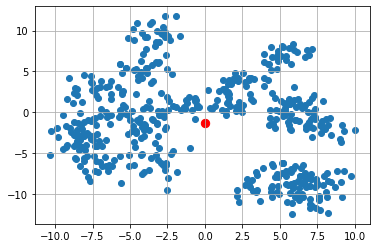

In [ ]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x,y)

plt.scatter(X[:,0], X[:,1])
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

Posição do centroide, acho que é esse o nome

In [ ]:
valor_cluster = kmeans.cluster_centers_
valor_cluster

array([[ 0.02618523, -1.30384304]])

Execução do algorítimo com 5 clusters

In [ ]:
wcss = []
for i in range(1, 6):
    kmeans_5 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans_5.fit(x,y)
    wcss.append(kmeans_5.inertia_)

wcss

[31547.372471390485,
 16949.214472147927,
 9464.847250570496,
 6005.101775346179,
 4717.404091931214]

Execução do algorítimo 20 vezes incrementando os clusters para analisar o grafico do cotovelo gerado

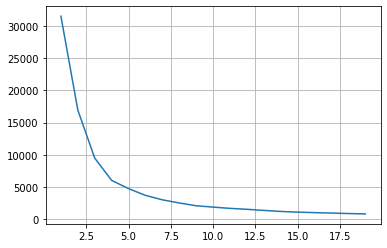

In [ ]:
wcss2 = []
for i in range(1, 20):
    kmeans_2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans_2.fit(x)
    wcss2.append(kmeans_2.inertia_)
plt.plot(range(1, 20), wcss2)
plt.grid()
plt.show()




Função que retorna a quantidade ideal de clusters baseada no wcss

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

Numero ideal de clusters para o dataset criado

In [ ]:
num_cluster = optimal_number_of_clusters(wcss2)
num_cluster

5